In [123]:
import tensorflow as tf
import cv2 as cv
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.fashion_mnist

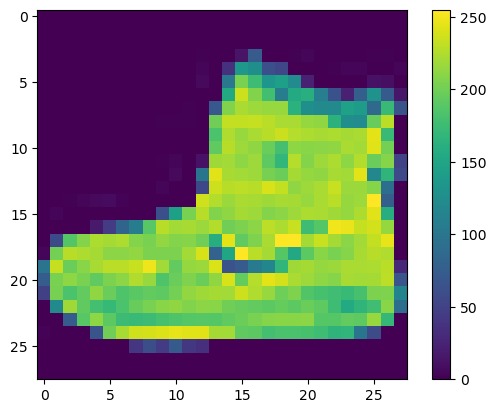

In [124]:
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
val_images = val_images.reshape(10000, 28, 28, 1)

plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

training_images = training_images / 255.0
val_images = val_images / 255.0

In [125]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [164]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 20)               

In [165]:
loss, accuracy = model.evaluate(val_images, val_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifier.model')
model = tf.keras.models.load_model('image_classifier.model')

313/313 [==============================] - 2s 6ms/step - loss: 0.3576 - accuracy: 0.9029
Loss: 0.35763436555862427
Accuracy: 0.902899980545044
INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


In [166]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [175]:
print("Validation Labels:")
for label in val_labels:
    print(class_names[label])

Validation Labels:
Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sneaker
Dress
Coat
Trouser
Pullover
Coat
Bag
T-shirt/top
Pullover
Sandal
Sneaker
Ankle boot
Trouser
Coat
Shirt
T-shirt/top
Ankle boot
Dress
Bag
Bag
Dress
Dress
Bag
T-shirt/top
Sneaker
Sandal
Sneaker
Ankle boot
Shirt
Trouser
Dress
Sneaker
Shirt
Sneaker
Pullover
Trouser
Pullover
Pullover
Coat
Coat
Sandal
Bag
Pullover
Pullover
Bag
Coat
Bag
T-shirt/top
Sneaker
Sneaker
Bag
Sandal
Trouser
Trouser
Pullover
Dress
Ankle boot
Bag
Sneaker
T-shirt/top
Pullover
Shirt
Pullover
Dress
Trouser
Pullover
Bag
Coat
Trouser
Bag
Sandal
Ankle boot
Sandal
T-shirt/top
Dress
Pullover
T-shirt/top
Shirt
Sandal
Dress
Shirt
Sneaker
Trouser
Bag
T-shirt/top
Trouser
Coat
Pullover
Dress
Shirt
Sneaker
Pullover
Sneaker
Bag
Sandal
Ankle boot
Ankle boot
Coat
Pullover
Sandal
Sneaker
T-shirt/top
Sandal
Pullover
Bag
Shirt
Sneaker
Bag
T-shirt/top
T-shirt/top
Ankle boot
Ankle boot
Dress
T-shirt/top
Bag
Coat
Trouser
Sandal
C

In [168]:
lable1 = val_images[0]
print(class_names[label])

Ankle boot


In [172]:
img = cv.imread('shoe1.png')

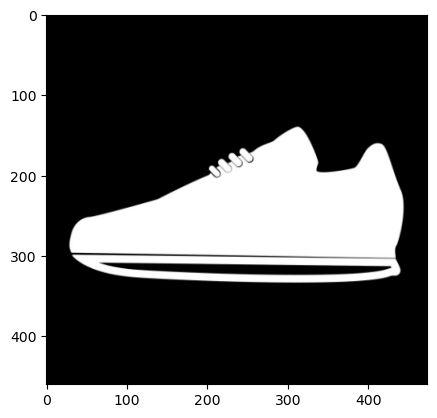

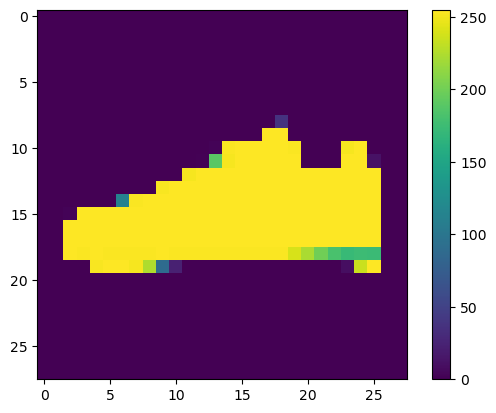

In [173]:
cv.COLOR_BGR2GRAY

plt.imshow(img, cmap = plt.cm.binary)
img = img[:,:,0]

img = cv.resize(img, (28, 28))
img = img.reshape(28, 28, 1)

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [174]:
prediction = model.predict(np.array([img]))
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 26ms/step
prediction is Bag
